<h1 style = "font-size:3rem;color:darkcyan"> MFCC - Mel Frequency Cepstrum Coefficient</h1>

MFCC are often used for speaker/speech recognition. 

The timbre of speech is dependend on how it is filtered by the shape of the vocal tract (lips, tongue, nosal cavity, etc.). This shape is related to the envelope of the short time power spectrum, which can be represented by the mel frequency cepstrum coefficient (MFCC)

In [276]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy as sp
from scipy import signal

In [359]:
# import audio
signal , sample_rate = librosa.load('samples/Violin.wav')

<h3 style = "font-size:3rem;color:darkcyan">Mel-frequency</h3>
Short time fourier transform, or spectrogram, does not quite represent audio features as humans perceive them as.
Ideally we want to have audio features in which only the relevant information of both frequency and amplitude is presented. Meaning both frequnecy and amplitude should be represented logarithmically.

We can transform frequency in such a way that each step has the same perceptual distance by transforming it to Mel-frequency. 
calculation: $m = 2595 \cdot log(1 + \frac{f}{700})$


Text(0.5, 1.0, 'Zoomed In')

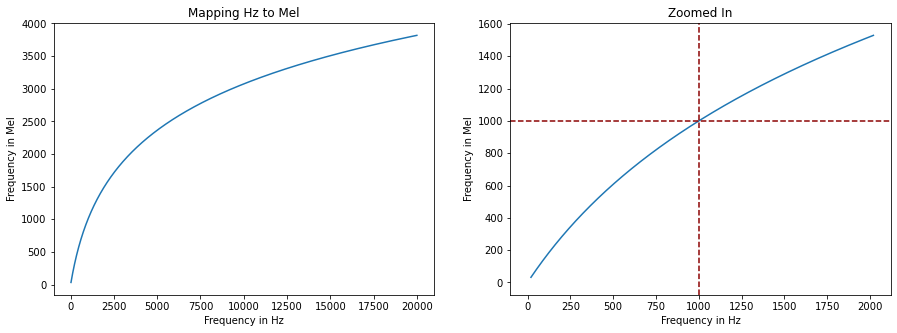

In [108]:
# Mapping:
f = np.arange(20,20000) # 20Hz to 20kHz
m = 2595 * np.log10(1 + f / 700)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(f,m)
plt.xlabel('Frequency in Hz')
plt.ylabel('Frequency in Mel')
plt.title('Mapping Hz to Mel')

plt.subplot(1,2,2)
plt.plot(f[:2000],m[:2000]) # zoomed in
plt.axline((1000,0),(1000,1000), linestyle ='--', color='darkred')
plt.axline((0,1000),(1000,1000), linestyle ='--', color='darkred')
plt.xlabel('Frequency in Hz')
plt.ylabel('Frequency in Mel')
plt.title('Zoomed In')

<h3 style = "font-size:3rem;color:darkcyan">Convert Spectrogram to Mel-frequency</h3>

1. choose number of mel bands
2. construct mel filter banks
3. apply filter banks to spectrogram

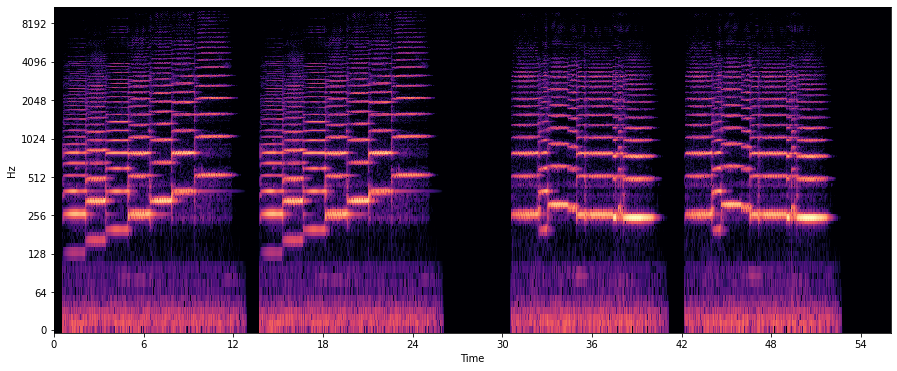

In [239]:
# Create spectrogram
plt.figure(figsize=(15, 6))
STFT = librosa.stft(signal, n_fft=2048) # return two vectors: magnitude and phase
STFT_db = librosa.amplitude_to_db(abs(STFT), ref=np.max)
img = librosa.display.specshow(STFT_db,
                                       y_axis='log',
                                       x_axis='time', 
                                       )

In [591]:
# Choose number of mel bands, often between 40 - 140
number_of_mel_bands = 60

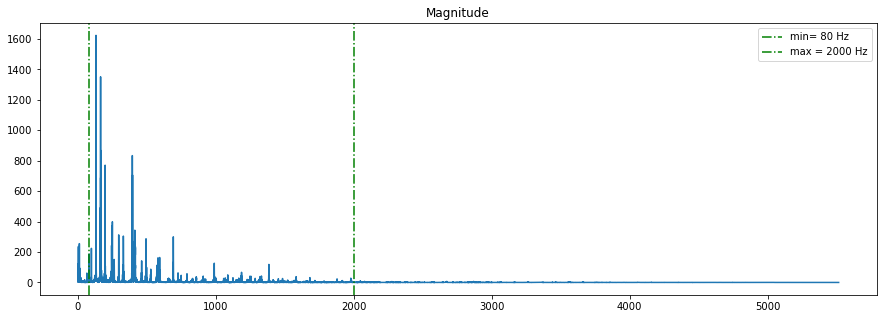

In [592]:
# Compute mel filter banks
# 1. Convert lowest and highest frequency to mel
# to check this see spectrum
#STFT = abs(np.fft.fft(signal))
#spec = librosa.display.specshow(DFT_mag)

plt.figure(figsize=(15,5))

N = len(signal)
DFT = np.fft.fft(signal)

f = np.linspace(1, sample_rate / 2, N) # convert to freq
plt.plot(f[:int(N/2) - 1], abs(DFT[:int(N/2) - 1]))
plt.title('Magnitude')
plt.axline((80,0),(80,1000), linestyle ='-.', color='green', label = 'min= 80 Hz')
plt.axline((2000,0),(2000,1000), linestyle ='-.', color='green', label = 'max = 2000 Hz')
plt.legend()

#: int(N/2) - 1


In [605]:
f_min = 80
f_max = 2000

m_min = 2595 * np.log10(1 + f_min / 700)
m_max = 2595 * np.log10(1 + f_max / 700)

In [606]:
# create # equally spaced bands:
mel_bands = np.linspace(m_min, m_max, number_of_mel_bands)
print(mel_bands)

[ 121.95608014  145.67478309  169.39348604  193.11218899  216.83089194
  240.54959489  264.26829784  287.98700079  311.70570374  335.42440669
  359.14310964  382.86181259  406.58051554  430.29921849  454.01792144
  477.73662438  501.45532733  525.17403028  548.89273323  572.61143618
  596.33013913  620.04884208  643.76754503  667.48624798  691.20495093
  714.92365388  738.64235683  762.36105978  786.07976273  809.79846568
  833.51716862  857.23587157  880.95457452  904.67327747  928.39198042
  952.11068337  975.82938632  999.54808927 1023.26679222 1046.98549517
 1070.70419812 1094.42290107 1118.14160402 1141.86030697 1165.57900992
 1189.29771286 1213.01641581 1236.73511876 1260.45382171 1284.17252466
 1307.89122761 1331.60993056 1355.32863351 1379.04733646 1402.76603941
 1426.48474236 1450.20344531 1473.92214826 1497.64085121 1521.35955416]


In [607]:
# convert points back to Hz
frequency_bands_target = 700 * (10**(mel_bands / 2595) - 1)
print(frequency_bands_target)


[  80.           96.58983085  113.53251105  130.83554534  148.50659812
  166.55349676  184.98423514  203.80697715  223.03006032  242.66199951
  262.7114907   283.18741479  304.09884159  325.45503382  347.2654512
  369.53975465  392.28781058  415.51969522  439.24569913  463.47633176
  488.22232605  513.49464323  539.30447768  565.66326186  592.58267139
  620.07463021  648.15131588  676.82516498  706.10887857  736.01542787
  766.55805998  797.75030376  829.60597581  862.13918659  895.36434669
  929.29617317  963.94969615  999.34026539 1035.48355713 1072.39558106
 1110.09268733 1148.59157388 1187.90929378 1228.06326282 1269.07126718
 1310.95147136 1353.72242618 1397.40307704 1442.01277226 1487.57127172
 1534.09875553 1581.61583305 1630.14355195 1679.70340757 1730.31735246
 1782.00780604 1834.7976646  1888.71031139 1943.76962702 2000.        ]


In [608]:
# round to nearest frequency bin as the signal is discrete
#frequency_bands = np.linspace(0, sample_rate /2 , len(STFT))
#plt.pcolormesh(STFT_db)

frequency_bands = librosa.fft_frequencies(sr=sample_rate, n_fft=2048)
print(frequency_bands)

matched_frequency_bands = np.zeros(number_of_mel_bands)
matched_frequency_index = np.zeros(number_of_mel_bands)
for i in range(0,number_of_mel_bands):
    matched_frequency_bands[i] = min(frequency_bands, key=lambda x:abs(x-frequency_bands_target[i]))
    matched_frequency_index[i], = np.where(frequency_bands == matched_frequency_bands[i])


[0.00000000e+00 1.07666016e+01 2.15332031e+01 ... 1.10034668e+04
 1.10142334e+04 1.10250000e+04]


Text(0.5, 1.0, 'Mel Filter Bank')

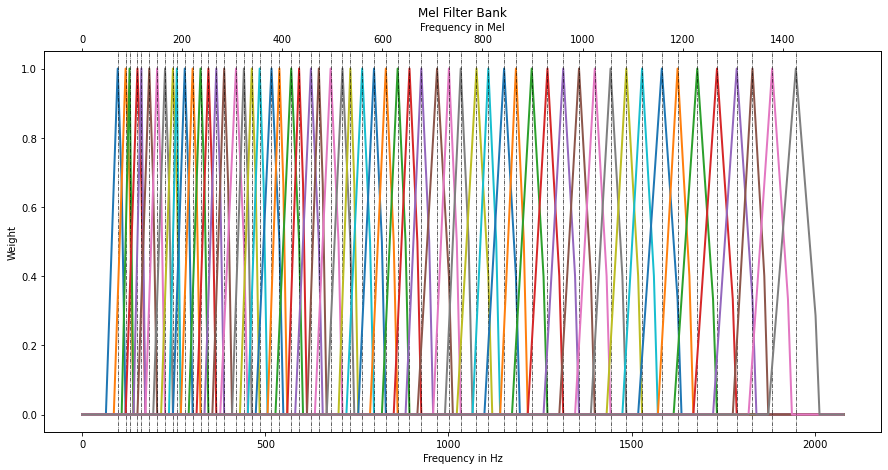

In [609]:
# create mel filter bank:
# triangular filters that ranges from previous center frequency to the next
#max_index = matched_frequency_index[-1] + (np.round( (matched_frequency_index[-1] - matched_frequency_index[-2]) / 2))

mel_filter_bank = np.zeros((number_of_mel_bands, len(frequency_bands)))

#plt.figure(figsize = (15,7))
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for i in range(1,number_of_mel_bands-1):
    # calculate range 
    window_length = 2 * int((matched_frequency_index[i] - matched_frequency_index[i - 1]))
    start = int(matched_frequency_index[i - 1])
    mel_filter_bank[i][start:start+window_length] = sp.signal.triang(window_length, False)
    
    # plot the window
    ax1.plot(frequency_bands[:int(max_index)], mel_filter_bank[i][:int(max_index)], lw = 2)
    ax1.axline((matched_frequency_bands[i],0),(matched_frequency_bands[i],1), linestyle ='-.', color='black', label = f'{matched_frequency_bands[i]} Hz', lw = 0.6)

ax1.set_ylabel('Weight')
ax1.set_xlabel('Frequency in Hz')

mel_spacing = np.linspace(0, int(mel_bands[-1]), 100)
ax2.plot(mel_spacing, np.ones(len(mel_spacing)), lw = 0) # Create a dummy plot
ax2.set_xlabel('Frequency in Mel')
plt.title('Mel Filter Bank')
#ax2.cla()


Mel filter bank shape = (60, 1025)
Spectrogram shape = (1025, 2412)
Mel Spectrogram shape = (60, 2412)


Text(0.5, 1.0, 'Mel Spectrogram')

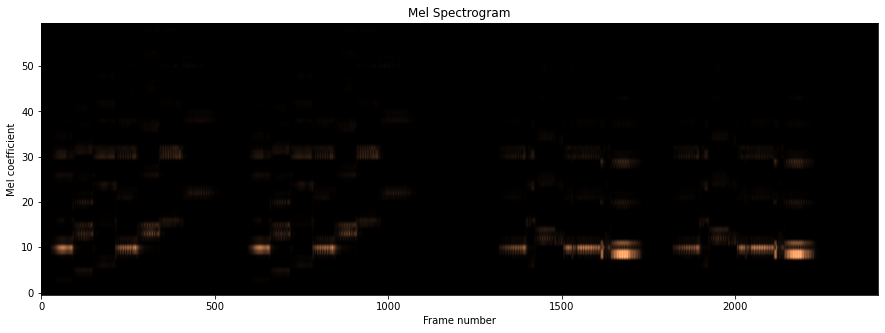

In [610]:
# Applying the mel filter bank to the spectrogram
# mel_filter_bank (M)=  (number of Mels, framesize /2 + 1)
# Spectrogram (Y) = (framesize / 2 + 1, number of frames)
# Mel spectrogram = MY

print(f'Mel filter bank shape = {np.shape(mel_filter_bank)}')
print(f'Spectrogram shape = {np.shape(STFT)}')

mel_spectrogram = np.matmul(mel_filter_bank, STFT)
print(f'Mel Spectrogram shape = {np.shape(mel_spectrogram)}')

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

ax.imshow(abs(mel_spectrogram), cmap='copper')


ax.set_aspect('auto')
plt.gca().invert_yaxis()
ax.set_ylabel('Mel coefficient')
ax.set_xlabel('Frame number')
plt.title('Mel Spectrogram')


<h3 style = "font-size:3rem;color:darkcyan">Cepstrum</h3>
Speech can be seen as a combination of two processes: 

1. Larynx creating a pulse train, controling the pitch of your voice
2. Vocal tract (tongue, lips, cavities) that filters the sound

In the time signal these are convolved, so they both show up as the same spike in the frequency-domain when performing the fourier transform. For speeker identification you want to seperate these the vocal tract, as this information is more important for speech recognition. Cepstrum essentially differentiates the vocal tract from the larynx. Larynx will have a higher rate of change, or quefrency, as it changes faster than the vocal tract, that will have low quefrency. 

Cepstrum can be seen as the rate of change in spectral bands that is created by: 

1. Perform DFT on the time signal
2. Perform a transformation to seperate the larynx from the vocal tract. This is done by taking the log of the magnitude
3. Perform the inverse DFT to get the cepstrum


In [581]:
# import audio file
signal , sample_rate = librosa.load('samples/Violin.wav')
signal = signal[10000:101024]

#win_size = 1024
#signal = signal[10000:10000+win_size]
N = len(signal)


# take snippet

# take DFT of fragment

DFT = np.fft.fft(signal)

DFT_log_pow = np.log10(abs(DFT))

C = np.fft.ifft(DFT_log_pow)

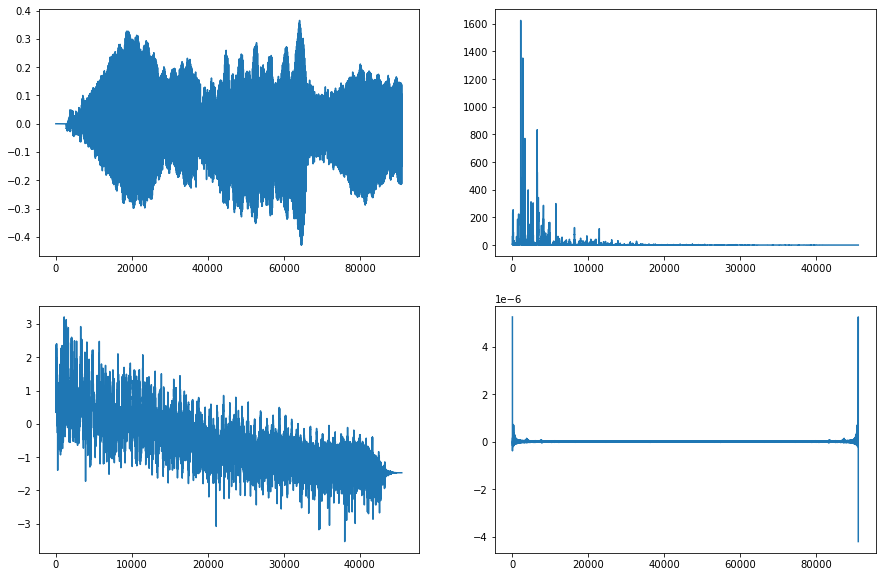

In [78]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.plot(signal)

plt.subplot(2,2,2)
plt.plot(abs(DFT[:int(np.round(N / 2) - 1)]))

plt.subplot(2,2,3)
plt.plot(DFT_log_pow[:int(np.round(N / 2) - 1)])

plt.subplot(2,2,4)
plt.plot(np.real(C[::-1] / N))


In [69]:
signal = signal[10000:101024]

N = len(signal)
print(N)
DFT = np.fft.fft(signal)

iDFT = np.fft.fft(DFT)

71024


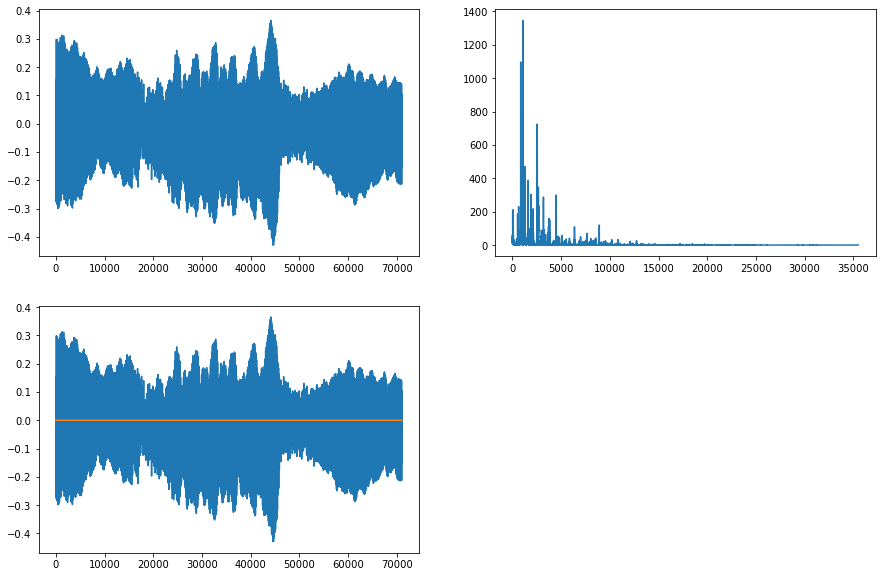

In [70]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.plot(signal)

plt.subplot(2,2,2)

plt.plot(abs(DFT[:int(np.round(N / 2) - 1)]))

plt.subplot(2,2,3)
plt.plot(np.real(iDFT[::-1]) / N)
plt.plot(np.imag(iDFT))